Using TensorFlow backend.


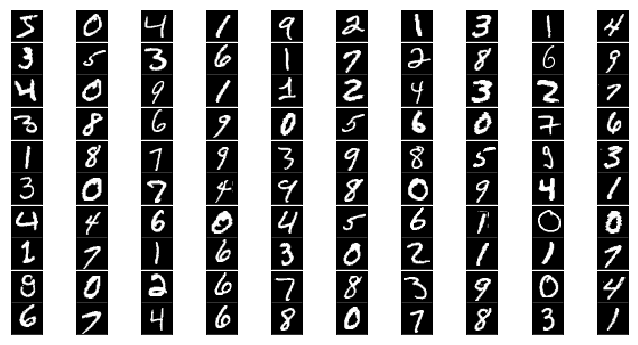

In [1]:
%matplotlib inline
import keras
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt
#Kerasの関数でデータの読み込み。データをシャッフルして学習データと訓練データに分割してくれる
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#MNISTデータの表示(学習データの最初の100枚を表示）
fig = plt.figure(figsize=(9, 9))
fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05, wspace=0.05)
for i in range(100):
    ax = fig.add_subplot(10, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(x_train[i].reshape((28, 28)), cmap='gray')

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils.np_utils import to_categorical
import numpy as np
 
#mnistデータの正規化
num_classes = 10
x_train1 = x_train.reshape(60000, 784)
x_test1 = x_test.reshape(10000, 784)
x_train1 = x_train1.astype('float32')
x_test1 = x_test1.astype('float32')
x_train1 /= 255
x_test1 /= 255
y_train = y_train.astype('int32')
y_test = y_test.astype('int32')
y_train = to_categorical(y_train, num_classes)
y_test =  to_categorical(y_test, num_classes)
#モデル作成
model = Sequential([
        Dense(512, input_shape=(784,)),
        Activation('sigmoid'),
        Dense(10),
        Activation('softmax')])
#コンパイル
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [3]:
batch_size = 128
epochs = 20
history = model.fit(x_train1, y_train,
                    batch_size=batch_size, epochs=epochs,
                    verbose=1, validation_data=(x_test1, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 110us/step - loss: 1.9462 - acc: 0.5597 - val_loss: 1.6087 - val_acc: 0.7466
Epoch 2/20
60000/60000 [==============================] - 6s 108us/step - loss: 1.3772 - acc: 0.7665 - val_loss: 1.1518 - val_acc: 0.8036
Epoch 3/20
60000/60000 [==============================] - 7s 109us/step - loss: 1.0275 - acc: 0.8122 - val_loss: 0.8896 - val_acc: 0.8340
Epoch 4/20
60000/60000 [==============================] - 7s 116us/step - loss: 0.8285 - acc: 0.8340 - val_loss: 0.7390 - val_acc: 0.8525
Epoch 5/20
60000/60000 [==============================] - 6s 107us/step - loss: 0.7096 - acc: 0.8478 - val_loss: 0.6449 - val_acc: 0.8634
Epoch 6/20
60000/60000 [==============================] - 7s 110us/step - loss: 0.6321 - acc: 0.8571 - val_loss: 0.5814 - val_acc: 0.8694
Epoch 7/20
60000/60000 [==============================] - 6s 107us/step - loss: 0.5783 - acc: 0.8633 - val_loss: 0.5362 - 

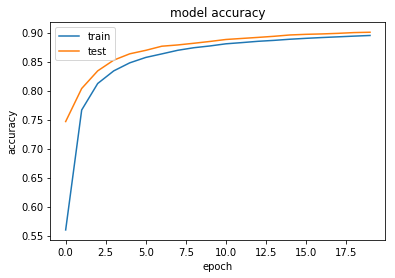

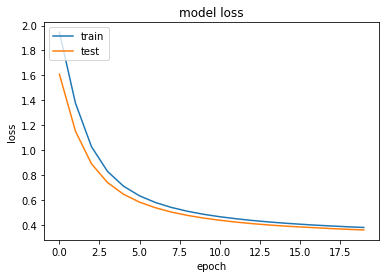

In [4]:
#ACC
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

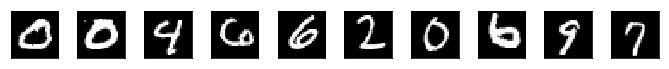

In [5]:
import random
#新しいウィンドウを描画
fig = plt.figure(figsize=(9,9))
fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05, wspace=0.4)
#テストデータをランダムに選択する準備
tstlist = list(range(10000))
random.shuffle(tstlist)
#ランダムに選択した10件を検証データとして表示
for i in range(10):
    ax = fig.add_subplot(1, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(x_test[tstlist[i]].reshape((28, 28)), cmap='gray')

In [6]:
for i in range(10):
    data = np.asarray(x_test1[tstlist[i]]).reshape((-1, 784))
    res = model.predict([data])[0]
    y = res.argmax()
    per = round(float(res[y] * 100),3) # --- 正解率を小数3桁精度(四捨五入)で求める
    print("{0} ({1} %)".format(y, per))

0 (98.91 %)
0 (99.967 %)
4 (49.907 %)
6 (74.245 %)
6 (97.72 %)
2 (92.696 %)
0 (98.682 %)
6 (95.947 %)
9 (88.921 %)
7 (71.693 %)
